In [206]:
#import os
#import shutil
import numpy as np
#import cv2
import matplotlib
from matplotlib import pyplot as plt
#import pywt
import pandas as pd
%matplotlib inline

In [207]:
# Set the default line color to dark pink
plt.rcParams['lines.color'] = '#FF1493'

# Set the facecolor of the figure and axes to gray
plt.rcParams['figure.facecolor'] = '#969696'
plt.rcParams['axes.facecolor'] = '#969696'

# Set a custom figure size (e.g., 12 inches wide and 8 inches high)
# plt.figure(figsize=(6, 4))

# Set the text color, axes label color, and tick color to white
plt.rcParams['text.color'] = 'Black'
plt.rcParams['axes.labelcolor'] = 'Black'
plt.rcParams['xtick.color'] = 'Black'
plt.rcParams['ytick.color'] = 'Black'

a=1
print(a)

1


In [208]:
df_1 = pd.read_csv("bengaluru_house_prices.csv")
df_1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [209]:
df_1.shape

(13320, 9)

In [210]:
df_1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [211]:
df_2 = df_1.drop(['area_type','society','balcony','availability'],axis='columns')
print(df_2.shape)
df_2.head(10)

(13320, 5)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [212]:
df_2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [213]:
df_3 = df_2.dropna()
df_3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [214]:
u_v = df_3['size'].unique()
u_v.sort()
for size in u_v:
    print(size)

1 BHK
1 Bedroom
1 RK
10 BHK
10 Bedroom
11 BHK
11 Bedroom
12 Bedroom
13 BHK
14 BHK
16 BHK
18 Bedroom
19 BHK
2 BHK
2 Bedroom
27 BHK
3 BHK
3 Bedroom
4 BHK
4 Bedroom
43 Bedroom
5 BHK
5 Bedroom
6 BHK
6 Bedroom
7 BHK
7 Bedroom
8 BHK
8 Bedroom
9 BHK
9 Bedroom


In [215]:
#df_3['size'].unique()

In [216]:
df_3['bhk'] = df_3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Asim-PC\AppData\Local\Temp\ipykernel_5444\2655874337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['bhk'] = df_3['size'].apply(lambda x: int(x.split(' ')[0]))


In [217]:
df_3.head(7)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4


In [218]:
u_v = df_3['bhk'].unique()
""" u_v.sort()
for bhk in u_v:
    print(size) """
u_v

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [219]:
df_3[df_3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [220]:
df_3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [221]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [222]:
df_3[df_3.total_sqft.apply(is_float)].head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [223]:
df_3[~(df_3.total_sqft.apply(is_float))].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


##### Now in the above dataframe we can convert the units like Sq.Meter or Perch in sqft or we can also neglect those values. Here we drop those values for ease. Also for the values displayed in the range format we are gonna take the mean for the values and will display that mean instead of the ranged value itself.

In [224]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [225]:
df_4 = df_3.copy()
df_4.total_sqft = df_4['total_sqft'].apply(sqft_to_num)
df_4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [226]:
df_4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [227]:
df_5 = df_4.copy()
df_5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [228]:
df_5['price_per_sqft'] = df_5.price*100000/df_5.total_sqft
df_5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [229]:
df_5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [230]:
len(df_5.location.unique())

1304

In [231]:
df_5.location = df_5.location.apply(lambda x: x.strip())
location_stats = df_5.groupby('location')['location'].agg('count').sort_values(ascending=False)
# location_stats = df_5['location'].value_counts(ascending=False)
location_stats

# for i in location_stats:
#     print(location_stats)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [232]:
print(len(location_stats[location_stats<=10]))
location_stats_less_than_10 = location_stats[location_stats<=10]

location_stats_less_than_10

1052


location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [233]:
print(len(df_5.location.unique()))
df_5.location = df_5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
print(len(df_5.location.unique()))
df_5.location

1293
242


0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [234]:
df_5.head(12)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outliers

In [235]:
df_5[df_5.total_sqft/df_5['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [236]:
df_5.shape

(13246, 7)

In [237]:
df_6 = df_5[~(df_5.total_sqft/df_5['bhk']<300)]
df_6.shape

(12502, 7)

In [238]:
df_6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [239]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_7 = remove_pps_outliers(df_6)
df_7.shape

(10241, 7)

In [240]:
u_v = df_1['location'].unique()

# Convert any numeric values to strings
u_v = [str(val) for val in u_v]

# Get the counts of each unique value
value_counts = df_1['location'].value_counts()
u_v.sort()
# Print the unique values and their counts
for size in u_v:
    print(f"{size}: {value_counts.get(size, 0)}")

 Anekal: 1
 Banaswadi: 1
 Basavangudi: 1
 Bhoganhalli: 1
 Devarabeesana Halli: 6
 Devarachikkanahalli: 14
 Electronic City: 2
 Mysore Highway: 4
 Rachenahalli: 2
 Sector 1 HSR Layout: 1
 Thanisandra: 3
 Whitefield: 1
 ittamadu: 1
 south: 2
1 Annasandrapalya: 1
1 Giri Nagar: 1
1 Immadihalli: 1
1 Ramamurthy Nagar: 1
12th cross srinivas nagar banshankari 3rd stage: 1
1A Block Koramangala: 1
1Channasandra: 1
1Hanuman Nagar: 1
1Hoysalanagar: 1
1Kasavanhalli: 1
1st Block BEL Layout: 2
1st Block HBR Layout: 3
1st Block HRBR Layout: 8
1st Block Jayanagar: 14
1st Block Koramangala: 10
1st Phase JP Nagar: 25
1st Stage Domlur: 1
1st Stage Indira Nagar: 5
1st Stage Radha Krishna Layout: 1
2 Bedroom Furnished Farm House in Kolar Road: 1
2Electronic City Phase II: 1
2nd Block Bel Layout: 2
2nd Block Hbr Layout: 1
2nd Block Hrbr Layout: 7
2nd Block Jayanagar: 4
2nd Block Koramangala: 2
2nd Phase JP Nagar: 9
2nd Phase Judicial Layout: 11
2nd Stage Arekere Mico Layout: 3
2nd Stage Nagarbhavi: 24
2nd ph

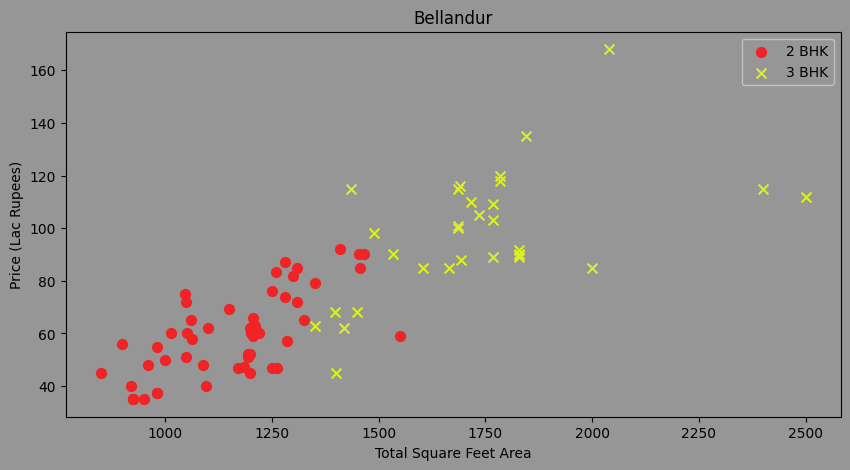

In [241]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]  
    
    plt.figure(figsize=(10, 5)) 
    
    plt.scatter(bhk2.total_sqft, bhk2.price, marker='o', color='#f02327', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='x', color='#dbf023', label='3 BHK', s=50)

    plt.ylabel("Price (Lac Rupees)")
    plt.xlabel("Total Square Feet Area")
    plt.title(location)
    plt.legend()

# function with DataFrame and location
plot_scatter_chart(df_7, "Bellandur")

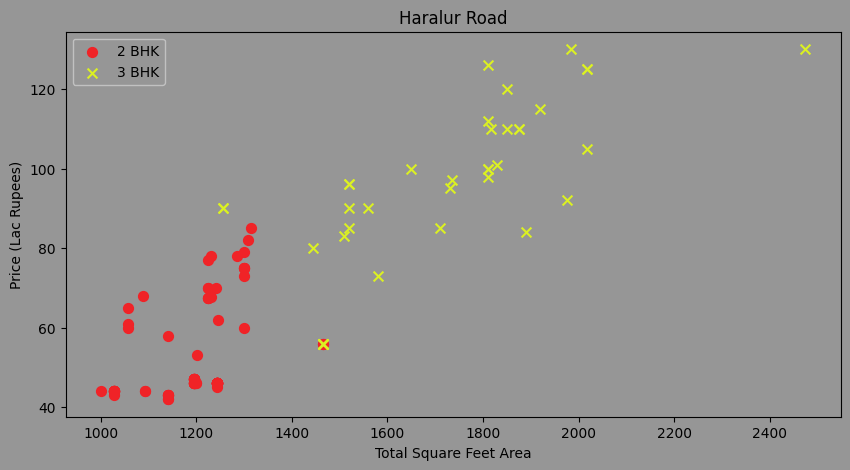

In [242]:
plot_scatter_chart(df_7,"Haralur Road")

###### There are some duplicate values to be removed like there are almost 152 values for **Haralur Road** but 1 value for **Haralur Road,**. Therefore we need to handle those as well!

Removing high mean value locations. Like for some locations the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).

In [244]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df_8 = remove_bhk_outliers(df_7)
# df8 = df7.copy()
df_8.shape

(7329, 7)

*Now we have removed those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment*

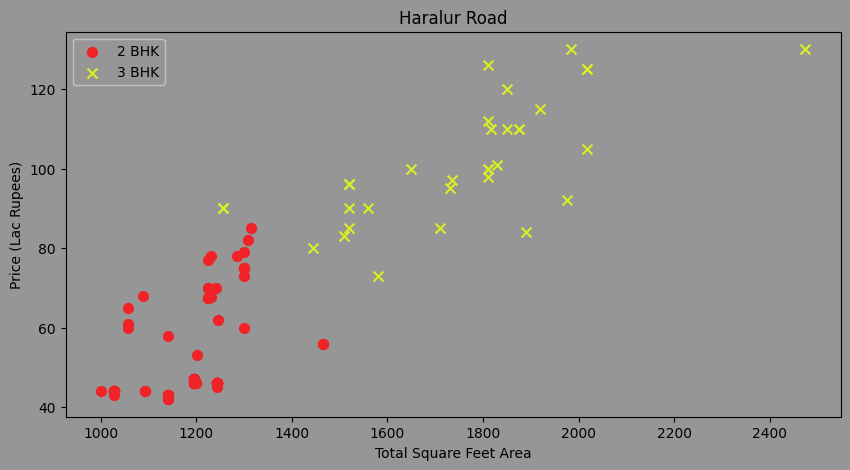

In [245]:
plot_scatter_chart(df_8,"Haralur Road")

Text(0, 0.5, 'Number of values (Counts)')

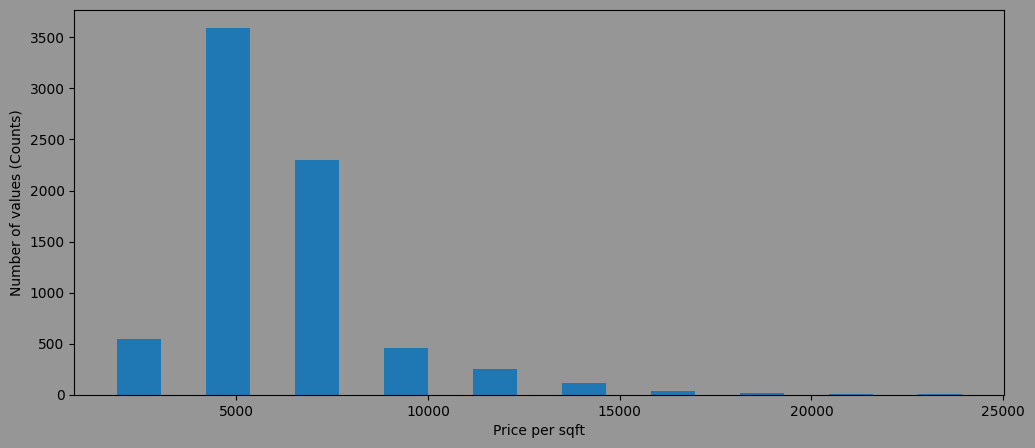

In [254]:
plt.figure(figsize=(12, 5)) 
plt.hist(df_8.price_per_sqft,rwidth = 0.5)
plt.xlabel("Price per sqft")
plt.ylabel("Number of values (Counts)")


In [252]:
df_8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [253]:
df_8[df_8.bath>9]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

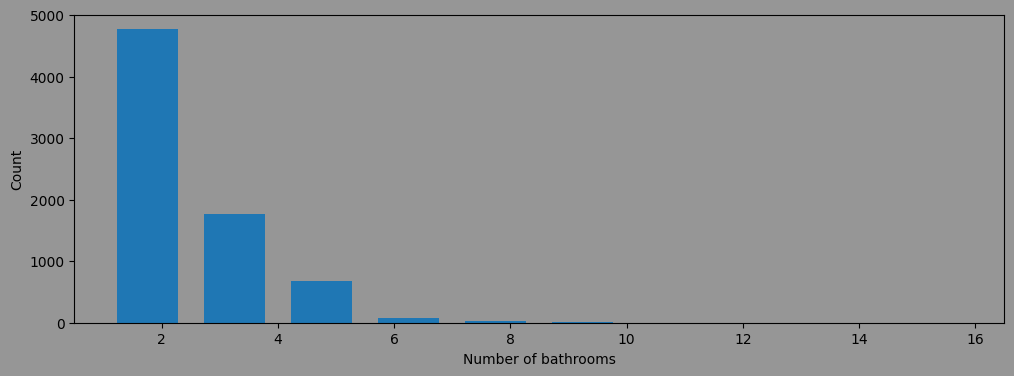

In [265]:
plt.figure(figsize=(12, 4)) 
plt.hist(df_8.bath,rwidth=0.7)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [266]:
df_8[df_8.bath>df_8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [267]:
df_9 = df_8[df_8.bath<df_8.bhk+2]
df_9.shape

(7251, 7)

In [268]:
df_9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [270]:
df_10 = df_9.drop(['size','price_per_sqft'],axis='columns')
df_10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


<h3 style='color:Yellow'>Using One Hot Encoding</h3>